# 第5章
自然言語100本ノック　https://nlp100.github.io/ja/　\
解答解説　https://kakedashi-engineer.appspot.com/nlp100/

日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

⇩係り受け解析とは
# https://www.slideshare.net/unnonouno/ss-5724050

In [ ]:
#ai.ja.zipをインストールし、解凍する
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

# MeCabをインストール（CaboChaの実行に必要）
!apt install mecab libmecab-dev mecab-ipadic-utf8


--2023-12-07 23:57:16--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2023-12-07 23:57:16 (12.5 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 15 not upgraded.
Need to get 7,367 kB o

In [ ]:
#CRF++のインストール
import gdown

url = "https://drive.google.com/uc?id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
output = "crfpp.tar.gz"
gdown.download(url, output, quiet=False)
#解凍
!tar xvf crfpp.tar.gz
%cd CRF++-0.58
!./configure && make && make install && ldconfig
%cd ..

In [ ]:
# CaboChaをインストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..

南瓜とは…https://taku910.github.io/cabocha/

In [ ]:
#係り受け解析結果をai.ja.txt.parsedに保存
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt

In [ ]:
!head -10 ./ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（



\

---


```
* 0 1D 0/1 -1.911675
* 1 2D 0/1 -1.911675
* 2 -1D 0/0 0.000000
私 は 本 を 読みます

```
"私"が"は"に係り、"は"が"本"に係り、"本"は係り先がない（文末に位置）\
最後の数値は、確信度。0に行くほど低い。マイナスなほど強い。


---




**40. 係り受け解析結果の読み込み（形態素）**\
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [ ]:
class Morph:
  def __init__(self,line):  #コンストラクタを定義.インストラクタ生成時に実行
    surface, other = line.split('\t') #表層形とその他をタブで分割
    other = other.split(',') #その他をコンマで分割
    self.surface = surface
    self.base = other[6]
    self.pos = other[0]
    self.pos1 = other[1]

filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
with open(filename, 'r') as f:
  for line in f:
    if line[0] == '*':  #先頭が*だったときはスキップ　文中に*アスタリスクを含む場合を考慮するべき
      continue
    elif line != 'EOS\n': #文末ではないとき
      morphs.append(Morph(line))  #データをMorphオブジェクトに変換してmorphsリストに追加
    else:                 #文末
      sentences.append(morphs)  #morphsリストをsentencesリストに追加
      morphs = []

for i in sentences[2]: #冒頭の説明文
  print(vars(i)) #vars()は __dict__ 属性を持つオブジェクトの表示

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

**41. 係り受け解析結果の読み込み（文節・係り受け）**\
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [21]:
class Sentence:
  def __init__(self, chunks):#文を表すクラス。文節のリスト（chunks）を持つ。また、各文節において、それがどの文節から係っているかを示すsrcsも持つ。
    self.chunks = chunks #chumksは文節のリスト
    for i, chunk in enumerate(self.chunks): #リストからひとつひとつ文節を見ていく
      if chunk.dst not in [None, -1]: #dstは係り先。つまり、係り先があったら
        self.chunks[chunk.dst].srcs.append(i) #srcsは係り元の文節のリストであり、dst、つまり係り先の文節のsrcsリストに係り元の文節のインデックスを入れるということになる。
        #(続き)これを行うことで、各文節がどの文節からかかっているかが記録される。

class Chunk: #文節を表すためのもの
  def __init__(self, morphs, dst, chunk_id):
    self.morphs = morphs
    self.dst = dst
    self.srcs = [] #係り元の文節のインデックスを格納するためのリスト
    self.chunk_id = chunk_id

class Morph: #形態素を表現するためのもの
  def __init__(self, line): #lineは形態素の情報が格納されている文字列
    surface, other = line.split("\t") #タブ文字で分割して、二つに代入
    other = other.split(",") #再代入
    self.surface = surface #インスタンス変数に表層系の代入
    self.base = other[-3] #後ろから３番目
    self.pos = other[0]
    self.pos1 = other[1]

sentences = [] #文リスト
chunks = [] #節リスト
morphs = [] #形態素リスト
chunk_id = 0 #文節番号

with open("./ai.ja.txt.parsed") as f:
  for line in f:
    if line[0] == "*":
      if morphs: #morphsリストに一つ以上の要素があれば
        chunks.append(Chunk(morphs, dst, chunk_id)) #新たなChunkオブジェクトをchunksリストに追加ぁ！
        chunk_id += 1
        morphs = []
      dst = int(line.split()[2].replace("D", ""))
    elif line != "EOS\n": #順次、各単語の形態素をmorphsリストに追加していく
      morphs.append(Morph(line))
    else: #文末の時
      chunks.append(Chunk(morphs, dst, chunk_id)) #最後の文節情報をchunksに追加
      sentences.append(Sentence(chunks)) #Sentenceオブジェクトを作成し、sentencesリストに追加

      morphs = []
      chunks = []
      dst = None
      chunk_id = 0

for chunk in sentences[2].chunks:
  chunk_str = "".join([morph.surface for morph in chunk.morphs])
  print(f"文節の文字列：{chunk_str}\n係り先の文節番号：{chunk.dst}\n")

文節の文字列：人工知能
係り先の文節番号：17

文節の文字列：（じんこうちのう、、
係り先の文節番号：17

文節の文字列：AI
係り先の文節番号：3

文節の文字列：〈エーアイ〉）とは、
係り先の文節番号：17

文節の文字列：「『計算
係り先の文節番号：5

文節の文字列：（）』という
係り先の文節番号：9

文節の文字列：概念と
係り先の文節番号：9

文節の文字列：『コンピュータ
係り先の文節番号：8

文節の文字列：（）』という
係り先の文節番号：9

文節の文字列：道具を
係り先の文節番号：10

文節の文字列：用いて
係り先の文節番号：12

文節の文字列：『知能』を
係り先の文節番号：12

文節の文字列：研究する
係り先の文節番号：13

文節の文字列：計算機科学
係り先の文節番号：14

文節の文字列：（）の
係り先の文節番号：15

文節の文字列：一分野」を
係り先の文節番号：16

文節の文字列：指す
係り先の文節番号：17

文節の文字列：語。
係り先の文節番号：34

文節の文字列：「言語の
係り先の文節番号：20

文節の文字列：理解や
係り先の文節番号：20

文節の文字列：推論、
係り先の文節番号：21

文節の文字列：問題解決などの
係り先の文節番号：22

文節の文字列：知的行動を
係り先の文節番号：24

文節の文字列：人間に
係り先の文節番号：24

文節の文字列：代わって
係り先の文節番号：26

文節の文字列：コンピューターに
係り先の文節番号：26

文節の文字列：行わせる
係り先の文節番号：27

文節の文字列：技術」、または、
係り先の文節番号：34

文節の文字列：「計算機
係り先の文節番号：29

文節の文字列：（コンピュータ）による
係り先の文節番号：31

文節の文字列：知的な
係り先の文節番号：31

文節の文字列：情報処理システムの
係り先の文節番号：33

文節の文字列：設計や
係り先の文節番号：33

文節の文字列：実現に関する
係り先の文節番号：34

文節の文字列：研究分野」とも
係り先の文節番号：35

文節の文字列：される。
係り先の文節番号：-1



**42. 係り元と係り先の文節の表示**\
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [22]:
words = ["Hello", " ", "World"]
result = "".join(words)
print(result)

Hello World


In [ ]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1: #文節が係り先を持たないとき→処理スキップ
    continue
  else:
    surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"]) #かかり元の中で、記号じゃない形態素の表層系をsurfに入れる。
    next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) #sentences[2].chunks[int(chunk.dst)は係り先の文節を示す。
    print(f"{surf}\t{next_surf}")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**\
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [ ]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1:
    continue
  else:
    surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
    next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"])
    pos_noun = [morph.surface for morph in chunk.morphs if morph.pos == "名詞"]
    pos_verb = [morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos == "動詞"]
    if pos_noun and pos_verb:
      print(f"{surf}\t{next_surf}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


**44. 係り受け木の可視化**\
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい

In [ ]:
#pydotをインストール
!pip install pydot
#日本語フォントをインストール
!apt install fonts-ipafont-gothic

import pydot_ng as pydot

pair = [] #文節のペアを格納する空のリスト
for chunk in sentences[2].chunks: #文節ごとにループ
  if int(chunk.dst) == -1:
    continue
  else: #さっきやったことと同じ
    surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
    next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) #文節のリストに係り先番号をindexに指定。その文節の形態素リストを取得
    pair.append((surf, next_surf))

img = pydot.Dot()
img.set_node_defaults(fontname="MS Mincho")
for s, t in pair:
  img.add_edge(pydot.Edge(s, t))
img.write_png("./result44.png")

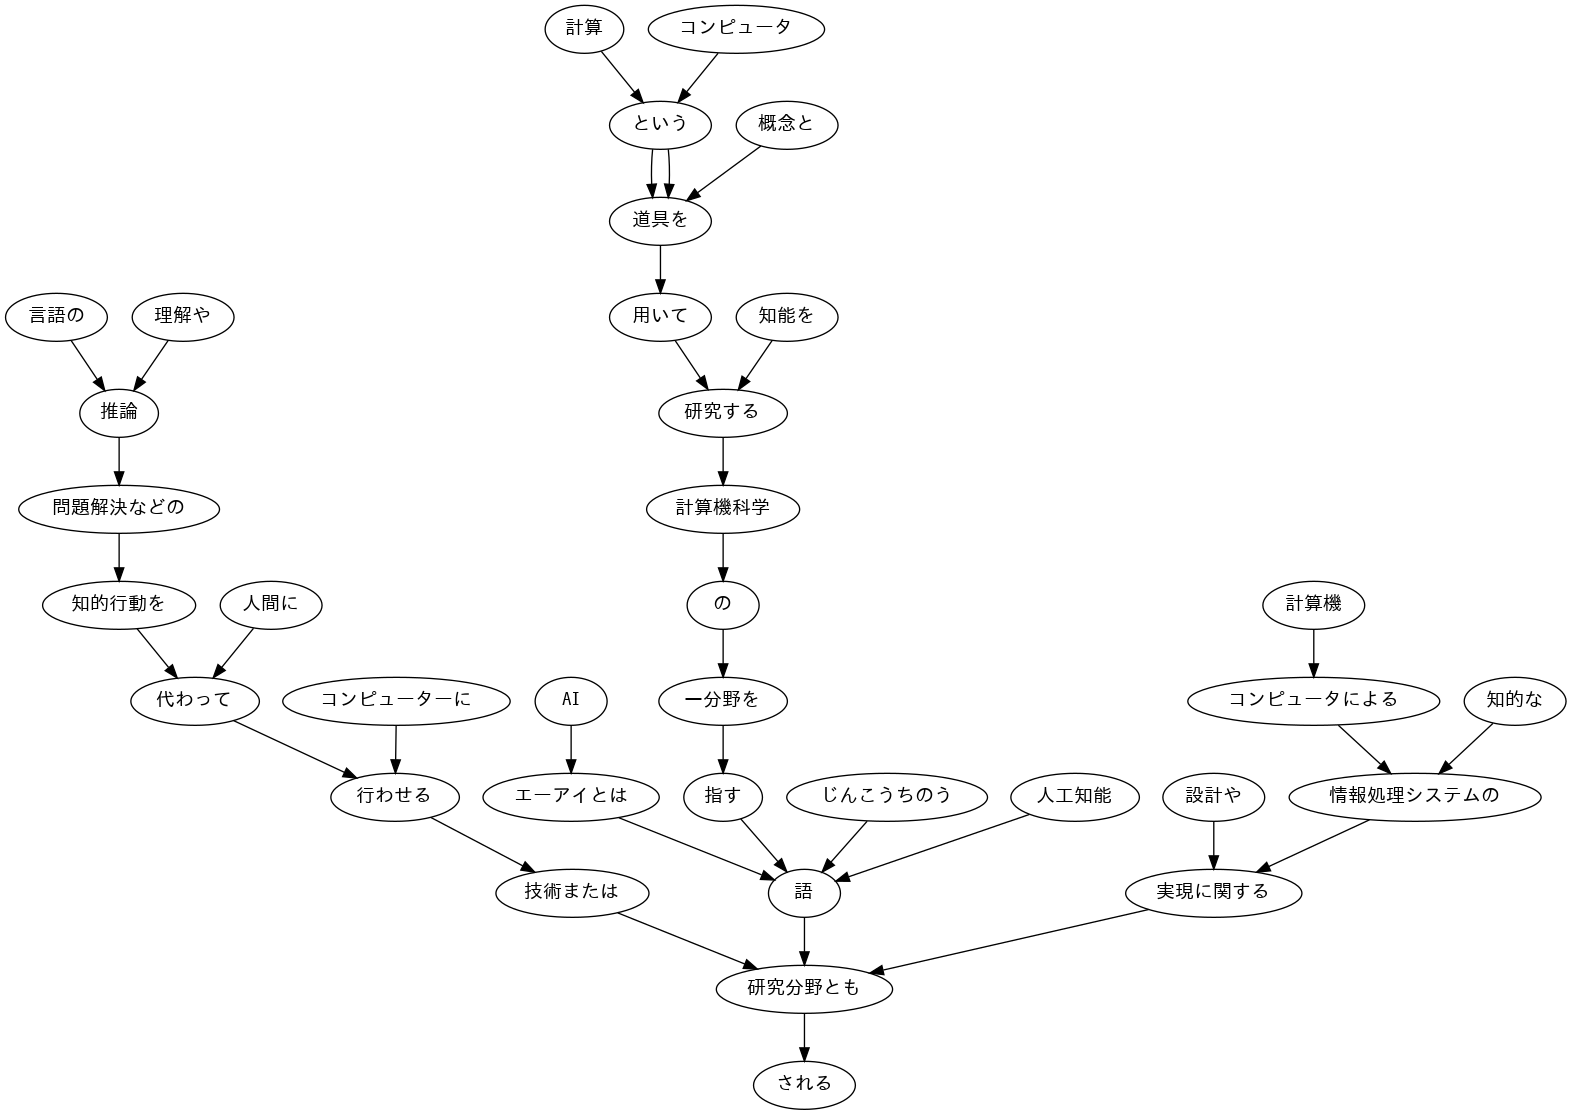

In [ ]:
from IPython.display import Image, display

# 画像のパスを指定
image_path = "/content/result44.png"

# 画像を表示
display(Image(filename=image_path))


**45. 動詞の格パターンの抽出**\
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

動詞を含む文節において，最左の動詞の基本形を述語とする
述語に係る助詞を格とする
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．


```
作り出す	で は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [25]:
with open('./ans45.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':
          cases=[] #動詞に係る助詞を格納するための空のリスト
          for src in chunk.srcs: #srcsは係り元のインデックスを格納している。
             cases = cases + [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
          if len(cases)>0:
            cases = sorted(list(set(cases)))
            form = ' '.join(cases)
            print(f'{morph.base}\t{form}', file=f)
          break


#コーパス中で頻出する述語と格パターンの組み合わせ
!cat ./ans45.txt | sort | uniq -c | sort -nr | head -n 5 #上位5つを表示してくれる
#「行う」「なる」「与える」という動詞の格パターン
!cat ./ans45.txt |grep "行う" | sort |uniq -c | sort -nr |head -n 5
!cat ./ans45.txt |grep "なる" | sort |uniq -c | sort -nr |head -n 5
!cat ./ans45.txt |grep "与える" | sort |uniq -c | sort -nr |head -n 5

     49 する	を
     19 する	が
     15 する	に
     15 する	と
     12 する	は を
      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を
      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も
      1 与える	に は を
      1 与える	が に
      1 与える	が など に


**46. 動詞の格フレーム情報の抽出**\
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．


```
作り出す	で は を	会議で ジョンマッカーシーは 用語を
```



In [ ]:
with open('./ans46.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':
          cases=[]
          items=[]

          for src in chunk.srcs:
             a = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']

             if len(a)>0:
               cases += a
               items.append(''.join([morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号'])) #

          if len(cases)>0:
            cases = sorted(list(set(cases)))
            form = ' '.join(cases)
            form2 = ' '.join(items)
            print(f'{morph.base}\t{form}\t{form2}', file=f)
          break


In [ ]:
!cat ./ans46.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	て に	代わって コンピューターに
する	と も	研究分野とも
述べる	で に の は	解説で 佐藤理史は 次のように
する	で を	知的能力を コンピュータ上で
する	を	推論判断を
する	を	画像データを


**47. 機能動詞構文のマイニング**\
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

学習を行う	に を	元に 経験を

```
学習を行う	に を	元に 経験を
```



In [ ]:
with open('./ans47.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞'
          for i, src in enumerate(chunk.srcs): #動詞に係る各文節に対して繰り返す。
            if len(sentence.chunks[src].morphs) == 2 and sentence.chunks[src].morphs[0].pos1=='サ変接続' and sentence.chunks[src].morphs[1].surface=='を':
              predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base])
              #係り先の文節がサ変接続名詞で、「を」で終わっている場合に以下の処理を実行。あとは同じ

              cases=[]
              items=[]

              for src2 in chunk.srcs[:i]+chunk.srcs[i+1:]:
                a = [morph.surface for morph in sentence.chunks[src2].morphs if morph.pos == '助詞']

                if len(a)>0:
                  cases += a
                  items.append(''.join(morph.surface for morph in sentence.chunks[src2].morphs if morph.pos != '記号'))

              if len(cases)>0:
                cases = sorted(list(set(cases)))
                form = ' '.join(cases)
                form2 = ' '.join(items)
                print(f'{predicate}\t{form}\t{form2}', file=f)
              break

In [ ]:
!cat ./ans47.txt | head -n 10

記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を行う	に を	元に 学習を
進化を見せる	て において は	活躍している 敵対的生成ネットワークは 加えて 生成技術において
進化をいる	て において は	活躍している 敵対的生成ネットワークは 加えて 生成技術において
開発を行う	は	エイダ・ラブレスは
意味をする	に	データに
研究を進める	て	費やして
命令をする	で	機構で
運転をする	に	元に


**48. 名詞から根へのパスの抽出**\
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．



```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出し
```
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．



```
ジョンマッカーシーは -> 作り出した
ＡＩに -> 関する -> 会議で -> 作り出した
会議で -> 作り出した
人工知能と -> いう -> 用語を -> 作り出した
用語を -> 作り出した
```





In [ ]:
sentence = sentences[2]
for chunk in sentence.chunks: #文節内に名詞が含まれているかを確認
    if '名詞' in [morph.pos for morph in chunk.morphs]:
      path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')] #名詞が含まれている場合、その文節の形態素から記号以外の部分を取り出し、path リストに追加。
      while chunk.dst != -1: #係り先が存在する限り
        path.append(''.join(morph.surface for morph in sentence.chunks[chunk.dst].morphs if morph.pos != '記号')) #係り先の文節の形態素から記号以外の部分を取り出し、path リストに追加
        chunk = sentence.chunks[chunk.dst] #次の係り先文節に移動
      print('->'.join(path))

人工知能->語->研究分野とも->される
じんこうちのう->語->研究分野とも->される
AI->エーアイとは->語->研究分野とも->される
エーアイとは->語->研究分野とも->される
計算->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
概念と->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
コンピュータ->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
知能を->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
計算機科学->の->一分野を->指す->語->研究分野とも->される
一分野を->指す->語->研究分野とも->される
語->研究分野とも->される
言語の->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
理解や->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
知的行動を->代わって->行わせる->技術または->研究分野とも->される
人間に->代わって->行わせる->技術または->研究分野とも->される
コンピューターに->行わせる->技術または->研究分野とも->される
技術または->研究分野とも->される
計算機->コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
知的な->情報処理システムの->実現に関する->研究分野とも->される
情報処理システムの->実現に関する->研究分野とも->される
設計や->実現に関する->研究分野と

**49. 名詞間の係り受けパスの抽出**\
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj
（i<j
）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
文節i
とj
に含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

文節i
から構文木の根に至る経路上に文節j
が存在する場合: 文節i
から文節j
のパスを表示
上記以外で，文節i
と文節j
から構文木の根に至る経路上で共通の文節k
で交わる場合: 文節i
から文節k
に至る直前のパスと文節j
から文節k
に至る直前までのパス，文節k
の内容を” | “で連結して表示
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．



```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．



```
Xは | Yに -> 関する -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -> いう -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -> 関する -> Yで
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。
Xに -> 関する -> 会議で | Yを | 作り出した。
Xで | Yと -> いう -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -> いう -> Yを
```




In [ ]:
from itertools import combinations
import re

sentence = sentences[2]
nouns = [] #名詞が含まれる文節のインデックスを格納するリスト
for i, chunk in enumerate(sentence.chunks):
  if [morph for morph in chunk.morphs if morph.pos == "名詞"]: #文中の各文節について、名詞が含まれているかを確認し、含まれている場合はその文節のインデックスを nouns リストに追加
    nouns.append(i)
for i, j in combinations(nouns, 2): #名詞同士の組み合わせに対して
  path_I = []
  path_J = []
  while i != j:
    if i < j: #文節iの構文木経路上に文節jが存在する場合
      path_I.append(i)
      i = sentence.chunks[i].dst
    else: #文節iの構文木経路上に文節jがない場合
      path_J.append(j)
      j = sentence.chunks[j].dst

  if len(path_J) == 0: # 文節Iの構文木上に文節Jが存在する場合
    X = "X" + "".join([morph.surface for morph in sentence.chunks[path_I[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
    Y = "Y" +  "".join([morph.surface for morph in sentence.chunks[i].morphs if morph.pos != "名詞" and morph.pos != "記号"])
    chunk_X = re.sub("X+", "X", X)
    chunk_Y = re.sub("Y+", "Y", Y)
    path_ItoJ = [chunk_X] + ["".join(morph.surface for n in path_I[1:] for morph in sentence.chunks[n].morphs)] + [chunk_Y]
    print(" -> ".join(path_ItoJ))
  else: # 文節Iの構文木上に文節Jが存在しない場合
    X = "X" + "".join([morph.surface for morph in sentence.chunks[path_I[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
    Y = "Y" + "".join([morph.surface for morph in sentence.chunks[path_J[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
    chunk_X = re.sub("X+", "X", X)
    chunk_Y = re.sub("Y+", "Y", Y)
    chunk_k = "".join([morph.surface for morph in sentence.chunks[i].morphs if morph.pos != "記号"])
    path_X = [chunk_X] + ["".join(morph.surface for n in path_I[1:] for morph in sentence.chunks[n].morphs if morph.pos != "記号")]
    path_Y = [chunk_Y] + ["".join(morph.surface for n in path_J[1: ]for morph in sentence.chunks[n].morphs if morph.pos != "記号")]
    print(" | ".join(["->".join(path_X), "->".join(path_Y), chunk_k]))

X-> | Yのう-> | 語
X-> | Y->エーアイとは | 語
X-> | Yとは-> | 語
X-> | Y->という道具を用いて研究する計算機科学の一分野を指す | 語
X-> | Yと->道具を用いて研究する計算機科学の一分野を指す | 語
X-> | Y->という道具を用いて研究する計算機科学の一分野を指す | 語
X-> | Yを->用いて研究する計算機科学の一分野を指す | 語
X-> | Yを->研究する計算機科学の一分野を指す | 語
X-> | Yする->計算機科学の一分野を指す | 語
X-> | Y->の一分野を指す | 語
X-> | Yを->指す | 語
X ->  -> Y
X->語 | Yの->推論問題解決などの知的行動を代わって行わせる技術または | 研究分野とも
X->語 | Yや->推論問題解決などの知的行動を代わって行わせる技術または | 研究分野とも
X->語 | Y->問題解決などの知的行動を代わって行わせる技術または | 研究分野とも
X->語 | Yなどの->知的行動を代わって行わせる技術または | 研究分野とも
X->語 | Yを->代わって行わせる技術または | 研究分野とも
X->語 | Yに->代わって行わせる技術または | 研究分野とも
X->語 | Yに->行わせる技術または | 研究分野とも
X->語 | Yまたは-> | 研究分野とも
X->語 | Y->コンピュータによる情報処理システムの実現に関する | 研究分野とも
X->語 | Yによる->情報処理システムの実現に関する | 研究分野とも
X->語 | Yな->情報処理システムの実現に関する | 研究分野とも
X->語 | Yの->実現に関する | 研究分野とも
X->語 | Yや->実現に関する | 研究分野とも
X->語 | Yに関する-> | 研究分野とも
X -> 語。 -> Yとも
Xのう-> | Y->エーアイとは | 語
Xのう-> | Yとは-> | 語
Xのう-> | Y->という道具を用いて研究する計算機科学の一分野を指す | 語
Xのう-> | Yと->道具を用いて研究する計算機科学の一分野を指す | 語
Xのう-> | Y->という道具を用いて研究する計算機科学の一分野を指す | 語
Xのう-> | Yを->用いて研